In [1]:
pip install patool 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 4.3 MB/s 


In [2]:
path = "/content/drive/MyDrive/HCMUS Teaching Materials/HK 2022-2023/4-Digital Image Processing/2.Labs"
filename = "Lab01 - Image.rar"

In [3]:
import os
import patoolib 

os.chdir(path)
patoolib.extract_archive(filename)

patool: Extracting Lab01 - Image.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/HCMUS Teaching Materials/HK 2022-2023/4-Digital Image Processing/2.Labs/Lab01 - Image.rar"
patool:     with cwd='./Unpack_2p2tlvpt'
patool: ... Lab01 - Image.rar extracted to `Sample01'.


'Sample01'

In [5]:
os.chdir(path + "/Sample01")
os.listdir()

['cat.jpg', 'coffee.jpg', 'motocycle.jpg']

In [6]:
# Note : If you want to have cv2 in your computer, run this to install : pip install opencv-python
import numpy as np 
import pandas as pd
import cv2 
from matplotlib import pyplot as plt 
from pylab import imread
from skimage.color import rgb2gray

In [7]:
def imshows(ImageData, LabelData, rows, cols, gridType = False):
  # Convert ImageData and LabelData to List
  from matplotlib import pyplot as plt
  ImageArray = list(ImageData)
  LabelArray = list(LabelData)
  if(rows == 1 & cols == 1):
    fig = plt.figure(figsize=(20,20))
  else:
    fig = plt.figure(figsize=(cols*8,rows*5))
        
  for i in range(1, cols * rows + 1):
      fig.add_subplot(rows, cols, i)
      image = ImageArray[i - 1]
      # If the channel number is less than 3, we display as grayscale image
      # otherwise, we display as color image
      if (len(image.shape) < 3):
          plt.imshow(image, plt.cm.gray)
          plt.grid(gridType)
      else:
          plt.imshow(image)
          plt.grid(gridType)
      plt.title(LabelArray[i - 1])
  plt.show()

In [8]:
def ShowThreeImages(IM1, IM2, IM3):
    imshows([IM1, IM2, IM3], ["Image 1","Image 2", "Image 3"], 1, 3)
def ShowTwoImages(IM1, IM2):
    imshows([IM1, IM2], ["Image 1","Image 2"], 1, 2)
def ShowOneImage(IM):
    imshows([IM], ["Image"], 1, 1)
def ShowListImages(listImage, row, col):
    listCaption = []
    for i in range(len(listImage)):
        listCaption.append(str(i))
    imshows(listImage,listCaption,row,col)

(402, 680, 3)
(402, 680)


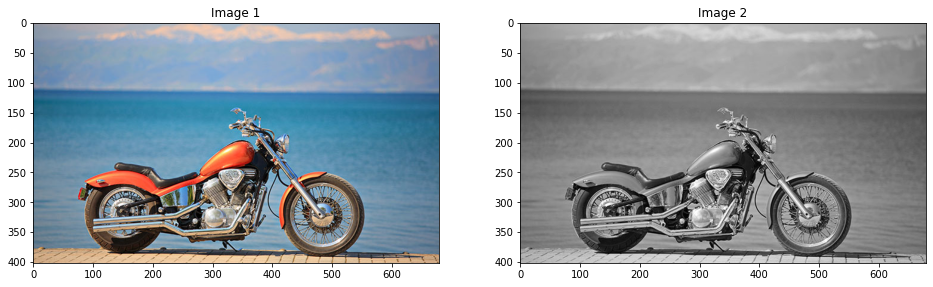

In [9]:
# Read Image 
image_color = imread("motocycle.jpg")
print(image_color.shape)
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
print(image_gray.shape)
# Display Image
ShowTwoImages(image_color, image_gray)

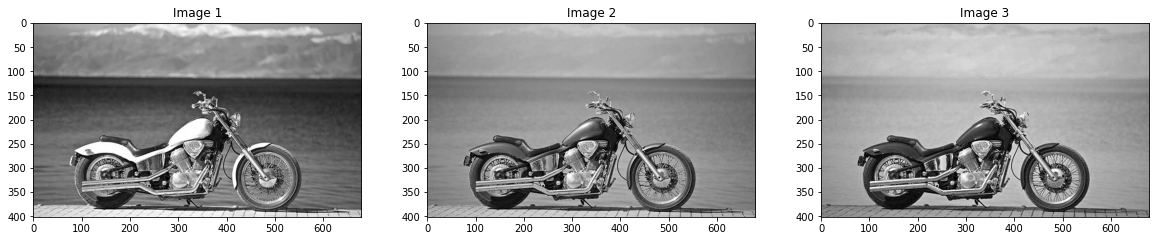

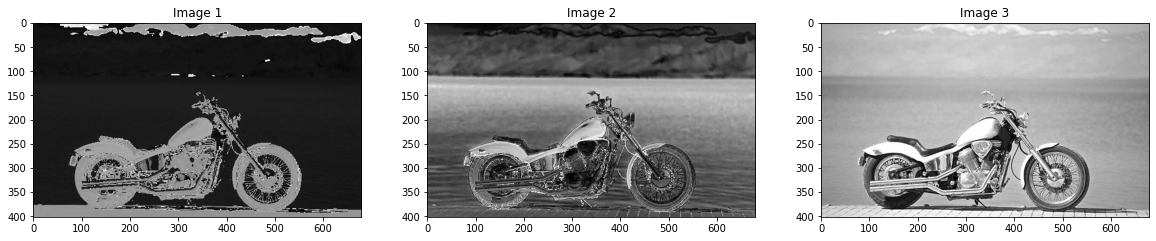

In [10]:
# Convert Image into HSV color spaces
image_hsv = cv2.cvtColor(image_color, cv2.COLOR_BGR2HSV)

# Show each channel R, G, and B
ShowThreeImages(image_color[:,:,0],image_color[:,:,1],image_color[:,:,2])

# Show each channel H , S and V
ShowThreeImages(image_hsv[:,:,0],image_hsv[:,:,1],image_hsv[:,:,2])

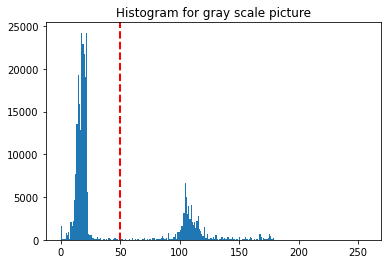

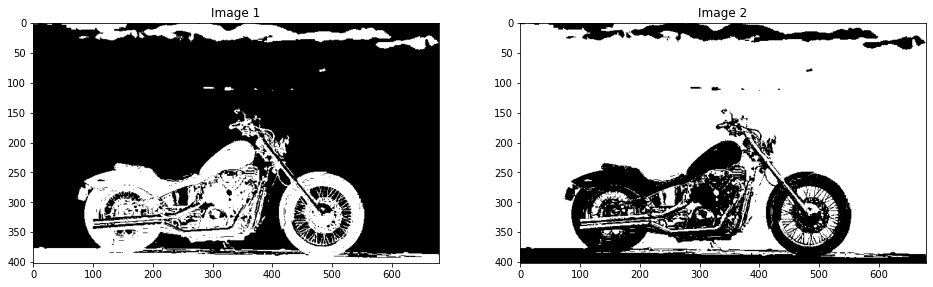

In [11]:
hue_img = image_hsv[:,:,0]
hue_threshold = 50

# Show Histogram of Hue Channel
hist = cv2.calcHist([hue_img],[0],None,[256],[0,256])
plt.hist(hue_img.ravel(),256,[0,256])
plt.axvline(x=hue_threshold, color='r', linestyle='dashed', linewidth=2)
plt.title('Histogram for gray scale picture')
plt.show()

# Use threshold to segment object by histogram
hue_binary01 = hue_img > hue_threshold
hue_binary02 = 1 - hue_binary01

ShowTwoImages(hue_binary01, hue_binary02)